In [ ]:
#google drive 연동

from google.colab import drive 
from os.path import join  

root = "/content/drive"     
print(root)                 
drive.mount(root)         

gdrive_path = 'My Drive/.kaggle' 
pjt_path = join(root, gdrive_path) 
print(pjt_path)

print ("Current folder is %s" % (pjt_path) )


/content/drive
Mounted at /content/drive
/content/drive/My Drive/.kaggle
Current folder is /content/drive/My Drive/.kaggle


In [ ]:
#경로 확인 및 실행

%cd "{pjt_path}"

!ls

/content/drive/My Drive/.kaggle
fer2013.zip  kaggle.json  test	train


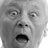

In [ ]:
#경로 내 이미지파일 확인

from IPython.display import Image
Image('/content/drive/My Drive/.kaggle/train/surprise/Training_99984132.jpg')

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras

In [ ]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import VGG16,InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
#이미지 크기, 색상 설정 : 데이터셋 자체의 이미지 크기/색상이 정제되어있어 해당 단계는 건너뛰었음
# Q. 구글 드라이브에도 로컬과 마찬가지로 변환한 이미지 데이터 저장이 가능한지? 코드는 무엇을 바꿔줘야 하는지

train_paths = {"../train/surprise"
        , "../train/sad"
        , "../train/neutral"
        , "../train/happy"
        , "../train/fear"
        , "../train/disgust"
        , "../train/angry"}

imgsize = [24, 24]
# Grayscale
use_gray = 1
# Save name
data_name = "custom_data"

print ("Your images should be at")
for i, path in enumerate(train_paths):
    print (" [%d/%d] %s/%s" % (i, len(train_paths), pjt_path, path)) 

print ("Data will be saved to %s" 
       % (pjt_path + '/data/' + data_name + '.npz'))


Your images should be at
 [0/7] /content/drive/My Drive/.kaggle/../train/sad
 [1/7] /content/drive/My Drive/.kaggle/../train/fear
 [2/7] /content/drive/My Drive/.kaggle/../train/surprise
 [3/7] /content/drive/My Drive/.kaggle/../train/happy
 [4/7] /content/drive/My Drive/.kaggle/../train/disgust
 [5/7] /content/drive/My Drive/.kaggle/../train/neutral
 [6/7] /content/drive/My Drive/.kaggle/../train/angry
Data will be saved to /content/drive/My Drive/.kaggle/data/custom_data.npz


In [ ]:
#이미지 크기, 색상 설정

test_paths = {"../test/surprise"
        , "../test/sad"
        , "../test/neutral"
        , "../test/happy"
        , "../test/fear"
        , "../test/disgust"
        , "../test/angry"}

imgsize = [24, 24]
# Grayscale
use_gray = 1
# Save name
data_name = "custom_data"

print ("Your images should be at")
for i, path in enumerate(test_paths):
    print (" [%d/%d] %s/%s" % (i, len(test_paths), pjt_path ,path)) 

print ("Data will be saved to %s" 
       % (pjt_path + '/data/' + data_name + '.npz'))

Your images should be at
 [0/7] /content/drive/My Drive/.kaggle/../test/sad
 [1/7] /content/drive/My Drive/.kaggle/../test/neutral
 [2/7] /content/drive/My Drive/.kaggle/../test/disgust
 [3/7] /content/drive/My Drive/.kaggle/../test/happy
 [4/7] /content/drive/My Drive/.kaggle/../test/angry
 [5/7] /content/drive/My Drive/.kaggle/../test/surprise
 [6/7] /content/drive/My Drive/.kaggle/../test/fear
Data will be saved to /content/drive/My Drive/.kaggle/data/custom_data.npz


In [ ]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        # print ("Current Image if GRAY!")
        return rgb

In [ ]:
#train/test 데이터 경로 설정
train_dir = "../.kaggle/train/" 
test_dir = "../.kaggle/test/"   

In [ ]:
row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    #폴더명 순서 정렬
    df = df.reindex(columns=['surprise','sad','neutral','happy','fear','disgust', 'angry'])
    return df

train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       surprise   sad  neutral  happy  fear  disgust  angry
train      3171  4830     4965   7215  4097      436   3995
      surprise   sad  neutral  happy  fear  disgust  angry
test       831  1247     1233   1774  1024      111    958


In [ ]:
# image_w = 28
# image_h = 28
  
# X = []
# Y = []

# count = 0 # category 갯수를 카운트 하기 위한 변수
# category_count = [] # category별로 카운트 된 것을 저장하기 위한 리스트

# for idex, categorie in enumerate(categories):
#     label = [0 for i in range(num_classes)]  # one-hot encoding
#     label[idex] = 1
#     image_dir = groups_folder_path + categorie + '/'

#     count = 0

#     for top, dir, f in os.walk(image_dir):
#         for filename in f:
#             print(image_dir+filename)
#             img = cv2.imread(image_dir+filename)
#             img = cv2.resize(img, (image_w, image_h)) # 절대 크기로 설정

#             X.append(img/256)  # 이미 256으로 scaling 해 준 것인가?
#             Y.append(label) # one-hot encoding

#             count += 1 # category 갯수 카운트

#     category_count.append([categorie, count]) # 총 카운트 된 카테고리 수 append

 
# X = np.array(X)
# Y = np.array(Y)

In [ ]:
#data generation

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255.,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )

Found 22968 images belonging to 7 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255.,
                                         validation_split = 0.2)

validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 1432 images belonging to 7 classes.


In [ ]:
model= tf.keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
epochs = 10
batch_size = 64

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, None, None, 32)    320       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, None, None, 64)    18496     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, None, None, 64)    256       
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, None, None, 64)    0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, None, None, 64)    0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, None, None, 128)   204928    
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, None, None, 128)   5

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/10
 24/359 [=>............................] - ETA: 1:32:00 - loss: 2.8316 - accuracy: 0.1556

KeyboardInterrupt: ignored

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()